# Convolutional Neural Networks (CNNs)

This notebook demonstrates how to build a Convolutional Neural Network (CNN) to classify images from the Cifar10 dataset.  We then evaluate the model on test data and report the performance metrics (accuracy, precision, recall).

In [16]:
#load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import keras
from keras.datasets import cifar10
from tensorflow.keras import layers
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [21]:
# load and preprocess data
(train_images, train_labels),(test_images,test_labels) = cifar10.load_data()

# normalize pixel values
train_images, test_images = train_images/255.0, test_images/255.0

# reshape image data for CNN input
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

# one-hot encode labels
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

# verify shapes
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [22]:
# Build the CNN model
model = Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flatten the 3D output to 1D
    layers.Flatten(),

    #Dense (fully connected) layer
    layers.Dense(128, activation='relu'),

    # Output layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.3639 - loss: 1.7375 - val_accuracy: 0.5422 - val_loss: 1.2439
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5844 - loss: 1.1722 - val_accuracy: 0.6315 - val_loss: 1.0363
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.6675 - loss: 0.9573 - val_accuracy: 0.6617 - val_loss: 0.9616
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.7030 - loss: 0.8530 - val_accuracy: 0.6811 - val_loss: 0.9257
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.7438 - loss: 0.7460 - val_accuracy: 0.6975 - val_loss: 0.8828
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.7614 - loss: 0.6805 - val_accuracy: 0.7074 - val_loss: 0.8604
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7884 - loss: 0.6093 - val_accuracy: 0.7190 - val_loss: 0.8283
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.8092 - loss: 0.5446 - 

In [24]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - 12ms/step - accuracy: 0.7213 - loss: 0.8571

Test accuracy: 0.7213000059127808


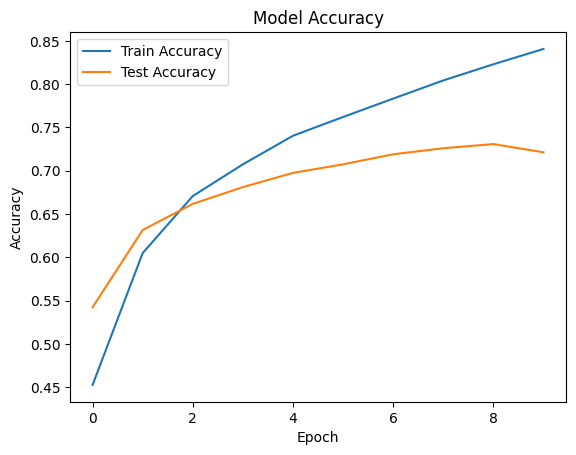

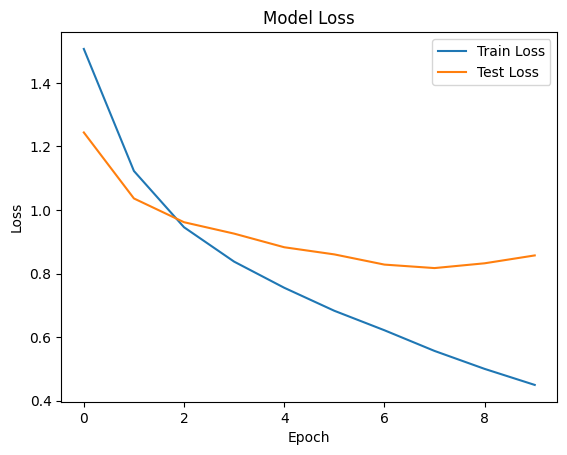

In [26]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


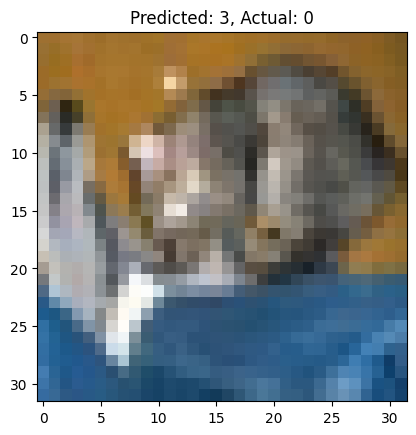

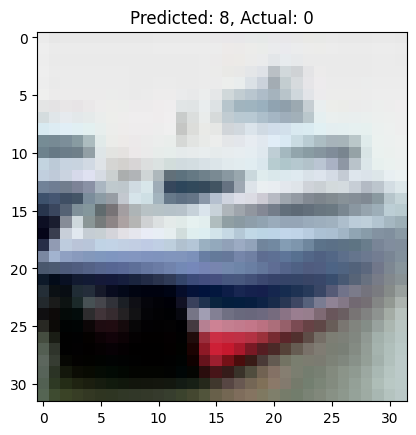

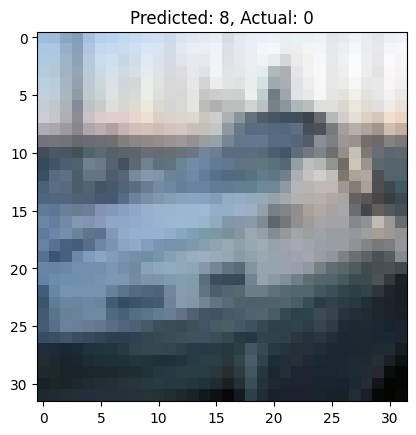

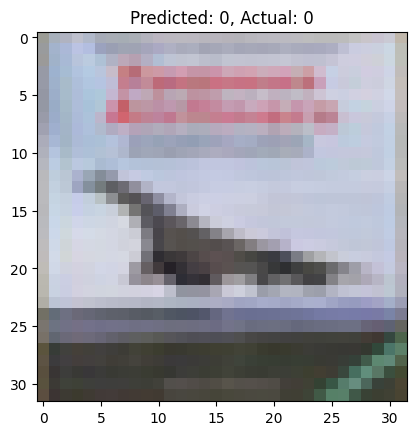

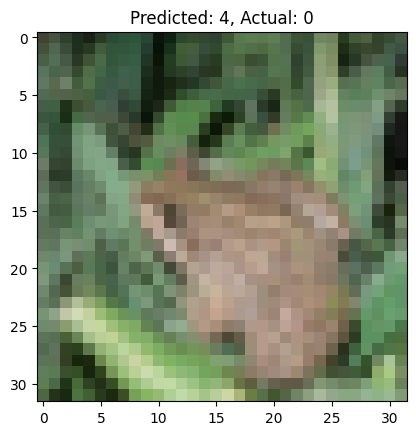

In [27]:
# make predictions
predictions = model.predict(test_images)

#display the first 5 predictions
for i in range(5):
    plt.imshow(test_images[i].reshape(32, 32, 3), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, Actual: {y_test[i].argmax()}')
    plt.show()